In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

df = pd.read_csv('dataset-final.csv')

df.head()


,No,NRP,Nama,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),Kabupaten/Kota,kecamatan,kelurahan,keamanan (ada/tidak),taman (ada/tidak),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km),Link Data Rumah
0,2,2272018,Nathanael Kanaya C,"Rp19,000,000,000",7,4,633,400,3,10000,Jakarta Selatan,Pengadegan,Pancoran,ada,ada,0.9,1.9,1.9,https://www.rumah123.com/properti/jakarta-sela...
1,3,2272018,Nathanael Kanaya C,"Rp3,500,000,000",4,4,121,153,1,2200,Jakarta Selatan,Pengadegan,Pancoran,tidak,ada,1,1.8,1.8,https://www.rumah123.com/properti/jakarta-sela...
2,4,2272018,Nathanael Kanaya C,"Rp67,000,000,000",5,6,2550,1107,8,7700,Jakarta Selatan,Cikoko,Pancoran,ada,ada,0.8,2,2,https://www.rumah123.com/properti/jakarta-sela...
3,5,2272018,Nathanael Kanaya C,"Rp13,300,000,000",4,2,706,708,5,4400,Jakarta Selatan,Rawajati,Pancoran,tidak,ada,1.2,2,2,https://www.rumah123.com/properti/jakarta-sela...
4,6,2272018,Nathanael Kanaya C,"Rp5,500,000,000",3,2,150,200,5,8800,Jakarta Selatan,Kalibata,Pancoran,ada,ada,0.5,2.3,2.3,https://www.rumah123.com/properti/jakarta-sela...


In [127]:
df.dtypes

No                                         int64
NRP                                        int64
Nama                                      object
harga rumah                               object
jumlah kamar tidur                        object
jumlah kamar mandi                        object
luas tanah (m2)                           object
luas bangunan (m2)                         int64
carport (mobil)                           object
pasokan listrik (watt)                    object
Kabupaten/Kota                            object
kecamatan                                 object
kelurahan                                 object
keamanan (ada/tidak)                      object
taman (ada/tidak)                         object
jarak dengan rumah sakit terdekat (km)    object
jarak dengan sekolah terdekat (km)        object
jarak dengan tol terdekat (km)            object
Link Data Rumah                           object
dtype: object

In [128]:
df = df.drop(columns=['No', 'NRP', 'Nama', 'Link Data Rumah'])
df

,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),Kabupaten/Kota,kecamatan,kelurahan,keamanan (ada/tidak),taman (ada/tidak),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km)
0,"Rp19,000,000,000",7,4,633,400,3,10000,Jakarta Selatan,Pengadegan,Pancoran,ada,ada,0.9,1.9,1.9
1,"Rp3,500,000,000",4,4,121,153,1,2200,Jakarta Selatan,Pengadegan,Pancoran,tidak,ada,1,1.8,1.8
2,"Rp67,000,000,000",5,6,2550,1107,8,7700,Jakarta Selatan,Cikoko,Pancoran,ada,ada,0.8,2,2
3,"Rp13,300,000,000",4,2,706,708,5,4400,Jakarta Selatan,Rawajati,Pancoran,tidak,ada,1.2,2,2
4,"Rp5,500,000,000",3,2,150,200,5,8800,Jakarta Selatan,Kalibata,Pancoran,ada,ada,0.5,2.3,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,"Rp 2,800,000,000",4,2,102,160,-,2200,Jakarta Utara,Kelapa Gading,Kelapa Gading Timur,tidak,ada,"1,6","1,8",4
2405,"Rp 10,900,000,000",3,3,230,400,2,4400,Jakarta Utara,Penjaringan,Kamal Muara,ada,ada,"1,7","5,8","3,5"
2406,"Rp 16,500,000,000",8,8,407,650,4,-,Jakarta Utara,Kelapa Gading,Kelapa Gading Barat,ada,ada,"2,9","3,2","4,3"
2407,"Rp 11,000,000,000",3,3,230,450,1,7700,Jakarta Utara,Penjaringan,Kamal Muara,ada,ada,2,"5,5",3


In [129]:
df.isnull().sum()

harga rumah                               0
jumlah kamar tidur                        0
jumlah kamar mandi                        0
luas tanah (m2)                           0
luas bangunan (m2)                        0
carport (mobil)                           1
pasokan listrik (watt)                    1
Kabupaten/Kota                            0
kecamatan                                 1
kelurahan                                 3
keamanan (ada/tidak)                      1
taman (ada/tidak)                         1
jarak dengan rumah sakit terdekat (km)    2
jarak dengan sekolah terdekat (km)        2
jarak dengan tol terdekat (km)            4
dtype: int64

In [130]:
df = df.dropna()
df

,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),Kabupaten/Kota,kecamatan,kelurahan,keamanan (ada/tidak),taman (ada/tidak),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km)
0,"Rp19,000,000,000",7,4,633,400,3,10000,Jakarta Selatan,Pengadegan,Pancoran,ada,ada,0.9,1.9,1.9
1,"Rp3,500,000,000",4,4,121,153,1,2200,Jakarta Selatan,Pengadegan,Pancoran,tidak,ada,1,1.8,1.8
2,"Rp67,000,000,000",5,6,2550,1107,8,7700,Jakarta Selatan,Cikoko,Pancoran,ada,ada,0.8,2,2
3,"Rp13,300,000,000",4,2,706,708,5,4400,Jakarta Selatan,Rawajati,Pancoran,tidak,ada,1.2,2,2
4,"Rp5,500,000,000",3,2,150,200,5,8800,Jakarta Selatan,Kalibata,Pancoran,ada,ada,0.5,2.3,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,"Rp 2,800,000,000",4,2,102,160,-,2200,Jakarta Utara,Kelapa Gading,Kelapa Gading Timur,tidak,ada,"1,6","1,8",4
2405,"Rp 10,900,000,000",3,3,230,400,2,4400,Jakarta Utara,Penjaringan,Kamal Muara,ada,ada,"1,7","5,8","3,5"
2406,"Rp 16,500,000,000",8,8,407,650,4,-,Jakarta Utara,Kelapa Gading,Kelapa Gading Barat,ada,ada,"2,9","3,2","4,3"
2407,"Rp 11,000,000,000",3,3,230,450,1,7700,Jakarta Utara,Penjaringan,Kamal Muara,ada,ada,2,"5,5",3


In [131]:
df.dtypes

harga rumah                               object
jumlah kamar tidur                        object
jumlah kamar mandi                        object
luas tanah (m2)                           object
luas bangunan (m2)                         int64
carport (mobil)                           object
pasokan listrik (watt)                    object
Kabupaten/Kota                            object
kecamatan                                 object
kelurahan                                 object
keamanan (ada/tidak)                      object
taman (ada/tidak)                         object
jarak dengan rumah sakit terdekat (km)    object
jarak dengan sekolah terdekat (km)        object
jarak dengan tol terdekat (km)            object
dtype: object

In [132]:
    
df.loc[:, 'harga rumah'] = df['harga rumah'].str.replace('Rp', '').str.replace(',', '').str.replace(' ', '').str.replace('Rp.', '').str.replace('.','')
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None  
df.loc[:, 'harga rumah'] = df['harga rumah'].apply(convert_to_float)
df = df.dropna(subset=['harga rumah'])
df

,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),Kabupaten/Kota,kecamatan,kelurahan,keamanan (ada/tidak),taman (ada/tidak),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km)
0,19000000000.0,7,4,633,400,3,10000,Jakarta Selatan,Pengadegan,Pancoran,ada,ada,0.9,1.9,1.9
1,3500000000.0,4,4,121,153,1,2200,Jakarta Selatan,Pengadegan,Pancoran,tidak,ada,1,1.8,1.8
2,67000000000.0,5,6,2550,1107,8,7700,Jakarta Selatan,Cikoko,Pancoran,ada,ada,0.8,2,2
3,13300000000.0,4,2,706,708,5,4400,Jakarta Selatan,Rawajati,Pancoran,tidak,ada,1.2,2,2
4,5500000000.0,3,2,150,200,5,8800,Jakarta Selatan,Kalibata,Pancoran,ada,ada,0.5,2.3,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,2800000000.0,4,2,102,160,-,2200,Jakarta Utara,Kelapa Gading,Kelapa Gading Timur,tidak,ada,"1,6","1,8",4
2405,10900000000.0,3,3,230,400,2,4400,Jakarta Utara,Penjaringan,Kamal Muara,ada,ada,"1,7","5,8","3,5"
2406,16500000000.0,8,8,407,650,4,-,Jakarta Utara,Kelapa Gading,Kelapa Gading Barat,ada,ada,"2,9","3,2","4,3"
2407,11000000000.0,3,3,230,450,1,7700,Jakarta Utara,Penjaringan,Kamal Muara,ada,ada,2,"5,5",3


In [133]:
columns_with_dash = ['jumlah kamar tidur', 'jumlah kamar mandi', 'luas tanah (m2)', 'carport (mobil)', 'pasokan listrik (watt)']
for col in columns_with_dash:
    df.loc[:, col] = df[col].str.replace('-', '0')

In [134]:
def convert_to_float(x):
    return float(x.replace(',', '.'))

columns_to_convert = ['jarak dengan rumah sakit terdekat (km)', 'jarak dengan sekolah terdekat (km)', 'jarak dengan tol terdekat (km)']
for column in columns_to_convert:
    df.loc[:, column] = df[column].apply(convert_to_float)


In [135]:
df.dtypes

harga rumah                               object
jumlah kamar tidur                        object
jumlah kamar mandi                        object
luas tanah (m2)                           object
luas bangunan (m2)                         int64
carport (mobil)                           object
pasokan listrik (watt)                    object
Kabupaten/Kota                            object
kecamatan                                 object
kelurahan                                 object
keamanan (ada/tidak)                      object
taman (ada/tidak)                         object
jarak dengan rumah sakit terdekat (km)    object
jarak dengan sekolah terdekat (km)        object
jarak dengan tol terdekat (km)            object
dtype: object

In [136]:
print('Kecamatan: ',df['kecamatan'].unique())
print('='*90)
print('Kelurahan: ',df['kelurahan'].unique())
print('='*90)
print('Harga: ',df['harga rumah'].unique())
print('='*90)
print('RS: ',df['jarak dengan rumah sakit terdekat (km)'].unique())
print('='*90)
print('Sekolah: ',df['jarak dengan sekolah terdekat (km)'].unique())
print('='*90)
print('Tol: ',df['jarak dengan tol terdekat (km)'].unique())

Kecamatan:  ['Pengadegan' 'Cikoko' 'Rawajati' 'Kalibata' 'DurenTiga' 'Pancoran'
 'Pasar Minggu' 'Cakung' 'Ciracas' 'Duren Sawit' 'Pasar Rebo' 'Cipayung'
 'Jatinegara' 'Pulo Gadung' 'Kramat Jati' 'Penggilingan' 'Cakung Timur'
 'Pulo Gebang' 'Makasar' 'Pondok Kelapa' 'Matraman' 'Cibubur'
 'Cipinang Melayu' 'Cipinang' 'Gambir' 'Cempaka Putih' 'Pejompongan'
 'Menteng' 'Bendungan Hilir' 'Kemayoran' 'Tanah Abang' 'Sawah Besar'
 'Petojo' 'Senen' 'Johar Baru' 'Cilincing' 'Penjaringan' 'Tanjung Priok'
 'Kelapa Gading' 'Pademangan' 'Kosambi' 'Sunter' 'Kapuk' 'Koja'
 'Pegangsaan dua' 'Pluit' 'Rorotan' 'Marunda' 'Sukapura' 'Taman Grisenda'
 'Pantai Muara' 'Muara Karang' 'Kembangan' 'Kebon Jeruk' 'Cengkareng'
 'Kalideres' 'Tambora' 'Palmerah' 'Grogol Petamburan' 'Tegal Alur'
 'Taman Sari' 'Jagakarsa' 'Tebet' 'Kembangan Selatan' 'Meruya'
 'Pegadungan' 'Jelambar Baru' 'Cikini' 'Kartini' 'Cideng' 'Glodok'
 'Sumur Batu' 'Salemba' 'Percetakan Negara' 'Gunung Sahari' 'Kramat'
 'Karang Anyar' 'Thamrin' 'P

In [137]:
max_price = df['luas tanah (m2)'].max()
print(f'Harga rumah tertinggi: {max_price}')

Harga rumah tertinggi: 990


In [138]:
max_price_rows = df[df['harga rumah'] == max_price]

df = df.drop(max_price_rows.index)

df

,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),Kabupaten/Kota,kecamatan,kelurahan,keamanan (ada/tidak),taman (ada/tidak),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km)
0,19000000000.0,7,4,633,400,3,10000,Jakarta Selatan,Pengadegan,Pancoran,ada,ada,0.9,1.9,1.9
1,3500000000.0,4,4,121,153,1,2200,Jakarta Selatan,Pengadegan,Pancoran,tidak,ada,1.0,1.8,1.8
2,67000000000.0,5,6,2550,1107,8,7700,Jakarta Selatan,Cikoko,Pancoran,ada,ada,0.8,2.0,2.0
3,13300000000.0,4,2,706,708,5,4400,Jakarta Selatan,Rawajati,Pancoran,tidak,ada,1.2,2.0,2.0
4,5500000000.0,3,2,150,200,5,8800,Jakarta Selatan,Kalibata,Pancoran,ada,ada,0.5,2.3,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,2800000000.0,4,2,102,160,0,2200,Jakarta Utara,Kelapa Gading,Kelapa Gading Timur,tidak,ada,1.6,1.8,4.0
2405,10900000000.0,3,3,230,400,2,4400,Jakarta Utara,Penjaringan,Kamal Muara,ada,ada,1.7,5.8,3.5
2406,16500000000.0,8,8,407,650,4,0,Jakarta Utara,Kelapa Gading,Kelapa Gading Barat,ada,ada,2.9,3.2,4.3
2407,11000000000.0,3,3,230,450,1,7700,Jakarta Utara,Penjaringan,Kamal Muara,ada,ada,2.0,5.5,3.0


In [139]:
df.loc[:, 'kelurahan'] = df['kelurahan'].str.replace('Kelurahan ', '')
df.loc[:, 'kecamatan'] = df['kecamatan'].str.replace('Ps.', 'Pasar')

In [140]:
columns_with_comma = []
df.loc[:, 'pasokan listrik (watt)'] = df['pasokan listrik (watt)'].str.replace(',', '0')

In [141]:
categorical = ['Kabupaten/Kota', 'kecamatan', 'kelurahan', 'keamanan (ada/tidak)', 'taman (ada/tidak)']

df = pd.get_dummies(df, columns=categorical)

In [142]:
numerical_float = ['harga rumah', 'jarak dengan rumah sakit terdekat (km)', 'jarak dengan sekolah terdekat (km)', 'jarak dengan tol terdekat (km)']
numerical_int = ['jumlah kamar tidur', 'jumlah kamar mandi', 'luas tanah (m2)', 'luas bangunan (m2)', 'carport (mobil)', 'pasokan listrik (watt)']
for colf in numerical_float:
    df[colf] = df[colf].astype(float)
for colint in numerical_int:
    df[colint] = df[colint].astype(int)

In [143]:
df.dtypes

harga rumah                   float64
jumlah kamar tidur              int32
jumlah kamar mandi              int32
luas tanah (m2)                 int32
luas bangunan (m2)              int32
                               ...   
kelurahan_kemanggsisan           bool
keamanan (ada/tidak)_ada         bool
keamanan (ada/tidak)_tidak       bool
taman (ada/tidak)_ada            bool
taman (ada/tidak)_tidak          bool
Length: 380, dtype: object

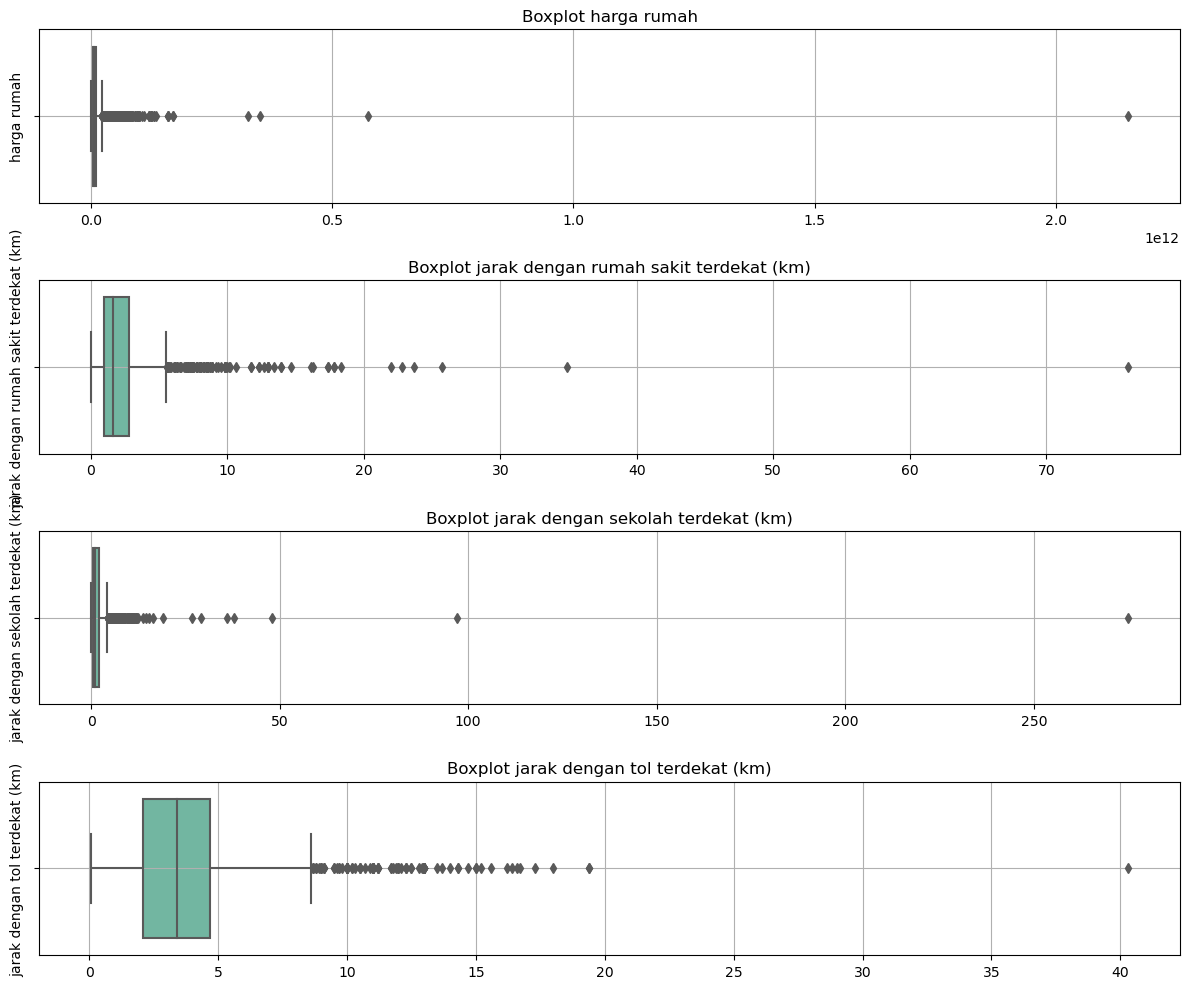

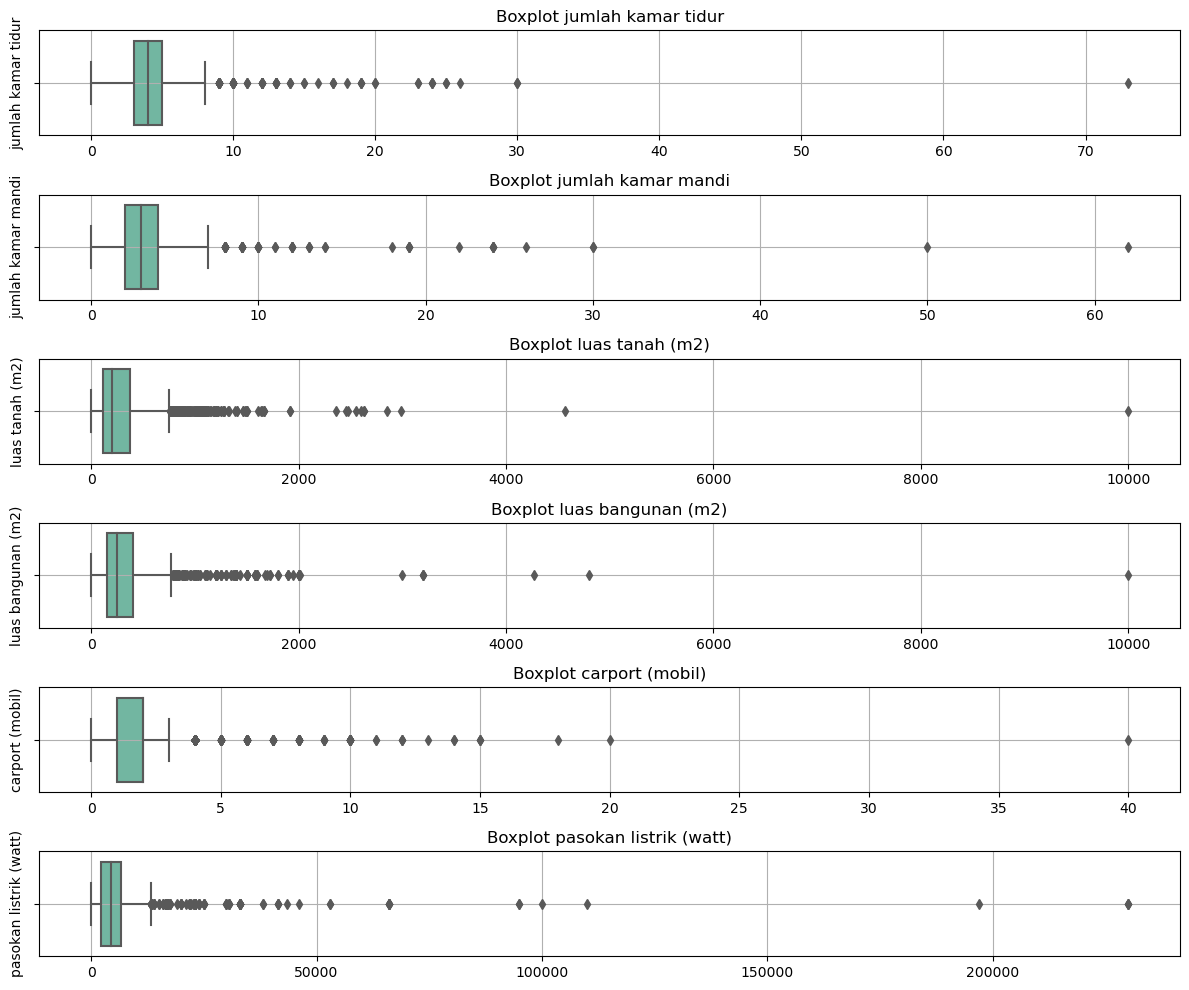

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_float = ['harga rumah', 'jarak dengan rumah sakit terdekat (km)', 'jarak dengan sekolah terdekat (km)', 'jarak dengan tol terdekat (km)']
numerical_int = ['jumlah kamar tidur', 'jumlah kamar mandi', 'luas tanah (m2)', 'luas bangunan (m2)', 'carport (mobil)', 'pasokan listrik (watt)']
def boxplot(list_column):
    plt.figure(figsize=(12, 10))
    for i, col in enumerate(list_column, start=1):
        plt.subplot(len(list_column), 1, i)
        sns.boxplot(x=df[col], palette='Set2')
        plt.title(f'Boxplot {col}')
        plt.xlabel('')
        plt.ylabel(col)
        plt.grid(True)

    plt.tight_layout()
    plt.show()
boxplot(numerical_float)
boxplot(numerical_int)

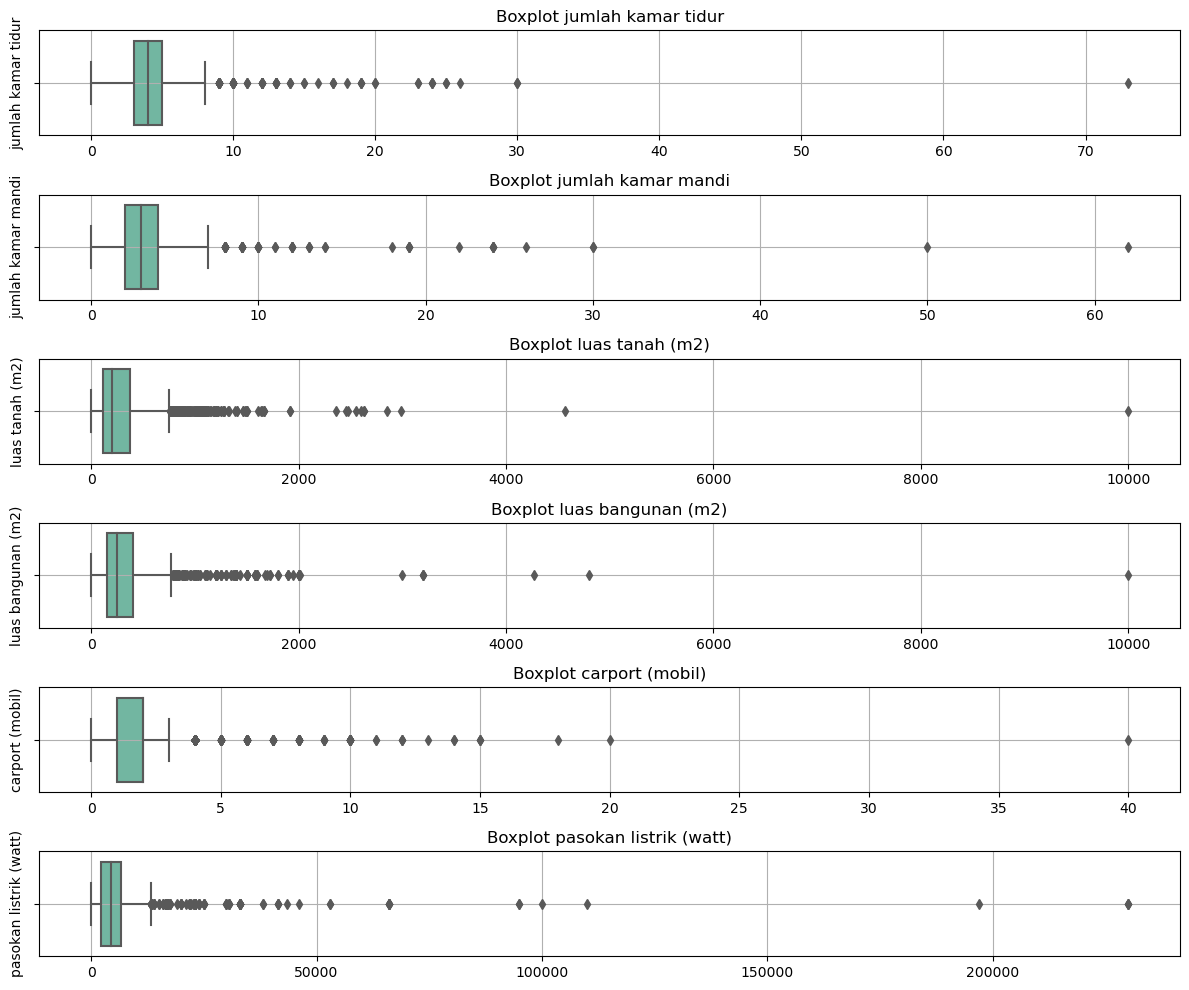

In [145]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_int, start=1):
    plt.subplot(len(numerical_int), 1, i)
    sns.boxplot(x=df[col], palette='Set2')
    plt.title(f'Boxplot {col}')
    plt.xlabel('')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [146]:
for col in numerical_float:
    max_price = df[col].max()
    print(f'{col} tertinggi: {max_price}')
    
    max_price_rows = df[df[col] == max_price]

    df = df.drop(max_price_rows.index)
    max_price = df[col].max()
    print(f'{col} tertinggi: {max_price}')

df

harga rumah tertinggi: 2150000000000.0
harga rumah tertinggi: 575000000000.0
jarak dengan rumah sakit terdekat (km) tertinggi: 76.0
jarak dengan rumah sakit terdekat (km) tertinggi: 34.9
jarak dengan sekolah terdekat (km) tertinggi: 275.0
jarak dengan sekolah terdekat (km) tertinggi: 97.0
jarak dengan tol terdekat (km) tertinggi: 40.3
jarak dengan tol terdekat (km) tertinggi: 19.4


,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km),...,kelurahan_Ujung Menteng,kelurahan_Utan Kayu,kelurahan_Utan Kayu Utara,kelurahan_Warakas,kelurahan_Wijaya Kusuma,kelurahan_kemanggsisan,keamanan (ada/tidak)_ada,keamanan (ada/tidak)_tidak,taman (ada/tidak)_ada,taman (ada/tidak)_tidak
0,1.900000e+10,7,4,633,400,3,10000,0.9,1.9,1.9,...,False,False,False,False,False,False,True,False,True,False
1,3.500000e+09,4,4,121,153,1,2200,1.0,1.8,1.8,...,False,False,False,False,False,False,False,True,True,False
2,6.700000e+10,5,6,2550,1107,8,7700,0.8,2.0,2.0,...,False,False,False,False,False,False,True,False,True,False
3,1.330000e+10,4,2,706,708,5,4400,1.2,2.0,2.0,...,False,False,False,False,False,False,False,True,True,False
4,5.500000e+09,3,2,150,200,5,8800,0.5,2.3,2.3,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,2.800000e+09,4,2,102,160,0,2200,1.6,1.8,4.0,...,False,False,False,False,False,False,False,True,True,False
2405,1.090000e+10,3,3,230,400,2,4400,1.7,5.8,3.5,...,False,False,False,False,False,False,True,False,True,False
2406,1.650000e+10,8,8,407,650,4,0,2.9,3.2,4.3,...,False,False,False,False,False,False,True,False,True,False
2407,1.100000e+10,3,3,230,450,1,7700,2.0,5.5,3.0,...,False,False,False,False,False,False,True,False,True,False


In [147]:
for col in numerical_int:
    max_price = df[col].max()
    print(f'{col} tertinggi: {max_price}')
    
    max_price_rows = df[df[col] == max_price]

    df = df.drop(max_price_rows.index)
    max_price = df[col].max()
    print(f'{col} tertinggi: {max_price}')

df

jumlah kamar tidur tertinggi: 73
jumlah kamar tidur tertinggi: 30
jumlah kamar mandi tertinggi: 62
jumlah kamar mandi tertinggi: 30
luas tanah (m2) tertinggi: 10000
luas tanah (m2) tertinggi: 4574
luas bangunan (m2) tertinggi: 10000
luas bangunan (m2) tertinggi: 4271
carport (mobil) tertinggi: 40
carport (mobil) tertinggi: 20
pasokan listrik (watt) tertinggi: 230000
pasokan listrik (watt) tertinggi: 197000


,harga rumah,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km),...,kelurahan_Ujung Menteng,kelurahan_Utan Kayu,kelurahan_Utan Kayu Utara,kelurahan_Warakas,kelurahan_Wijaya Kusuma,kelurahan_kemanggsisan,keamanan (ada/tidak)_ada,keamanan (ada/tidak)_tidak,taman (ada/tidak)_ada,taman (ada/tidak)_tidak
0,1.900000e+10,7,4,633,400,3,10000,0.9,1.9,1.9,...,False,False,False,False,False,False,True,False,True,False
1,3.500000e+09,4,4,121,153,1,2200,1.0,1.8,1.8,...,False,False,False,False,False,False,False,True,True,False
2,6.700000e+10,5,6,2550,1107,8,7700,0.8,2.0,2.0,...,False,False,False,False,False,False,True,False,True,False
3,1.330000e+10,4,2,706,708,5,4400,1.2,2.0,2.0,...,False,False,False,False,False,False,False,True,True,False
4,5.500000e+09,3,2,150,200,5,8800,0.5,2.3,2.3,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,2.800000e+09,4,2,102,160,0,2200,1.6,1.8,4.0,...,False,False,False,False,False,False,False,True,True,False
2405,1.090000e+10,3,3,230,400,2,4400,1.7,5.8,3.5,...,False,False,False,False,False,False,True,False,True,False
2406,1.650000e+10,8,8,407,650,4,0,2.9,3.2,4.3,...,False,False,False,False,False,False,True,False,True,False
2407,1.100000e+10,3,3,230,450,1,7700,2.0,5.5,3.0,...,False,False,False,False,False,False,True,False,True,False


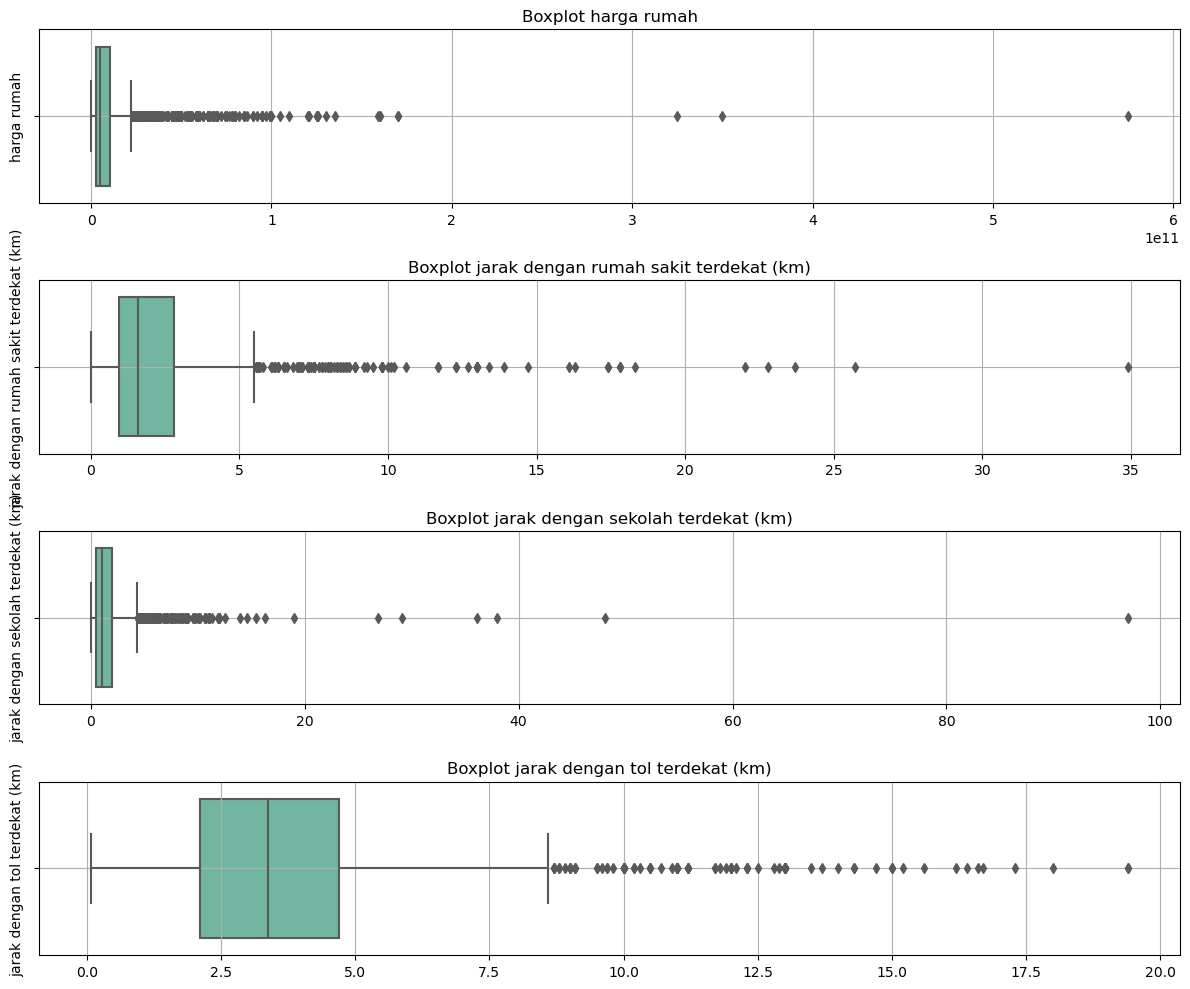

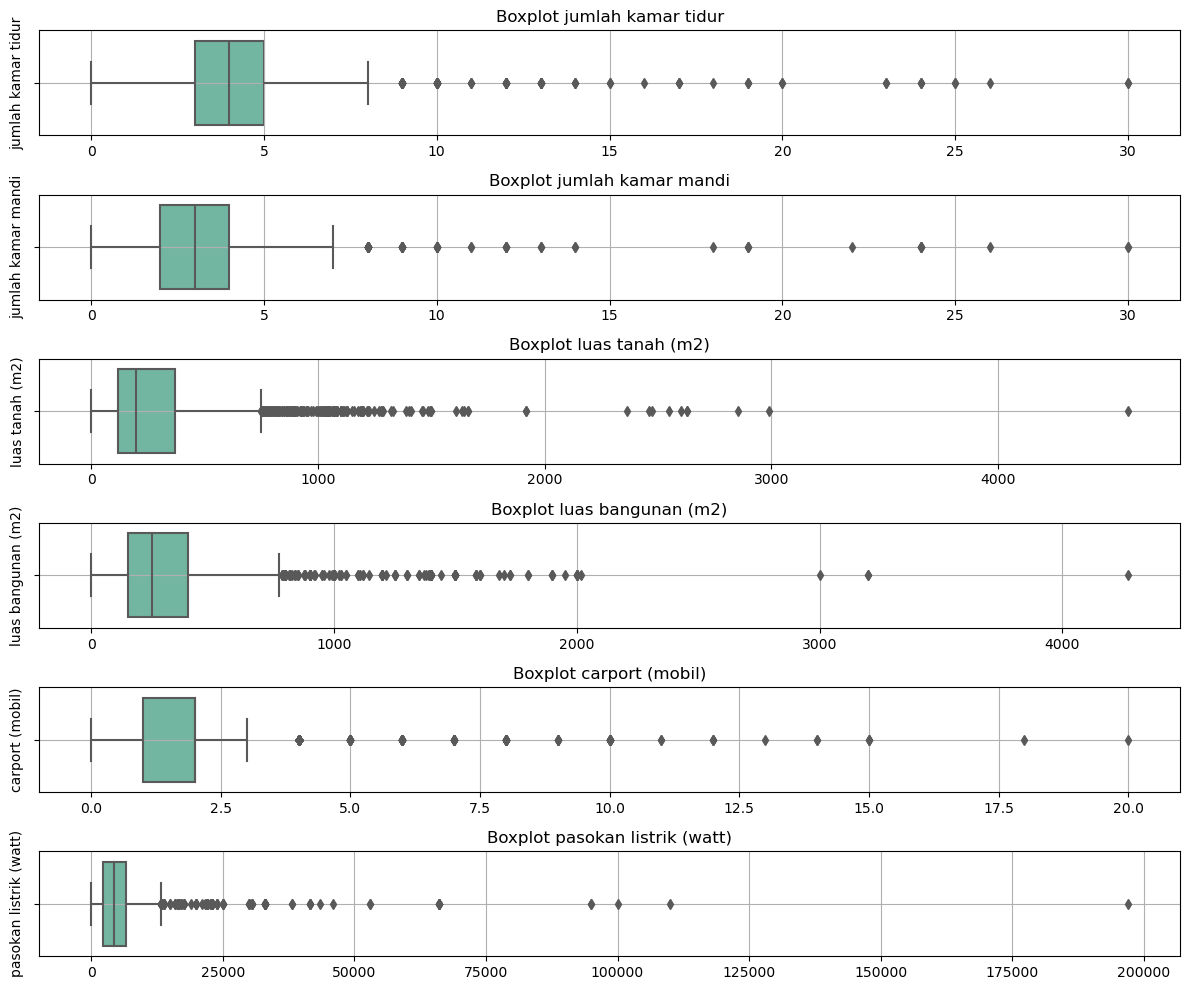

In [148]:
boxplot(numerical_float)
boxplot(numerical_int)

In [149]:
outlier = ['luas tanah (m2)','pasokan listrik (watt)','luas bangunan (m2)','harga rumah','jarak dengan sekolah terdekat (km)','jarak dengan rumah sakit terdekat (km)']
for col in outlier:
    max_price = df[col].max()
    print(f'{col} tertinggi: {max_price}')
    
    max_price_rows = df[df[col] == max_price]

    df = df.drop(max_price_rows.index)
    max_price = df[col].max()
    print(f'{col} tertinggi: {max_price}')

luas tanah (m2) tertinggi: 4574
luas tanah (m2) tertinggi: 2990
pasokan listrik (watt) tertinggi: 197000
pasokan listrik (watt) tertinggi: 110000
luas bangunan (m2) tertinggi: 3200
luas bangunan (m2) tertinggi: 3000
harga rumah tertinggi: 575000000000.0
harga rumah tertinggi: 350000000000.0
jarak dengan sekolah terdekat (km) tertinggi: 97.0
jarak dengan sekolah terdekat (km) tertinggi: 48.1
jarak dengan rumah sakit terdekat (km) tertinggi: 34.9
jarak dengan rumah sakit terdekat (km) tertinggi: 25.7


In [150]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

outliers = {}

for col in numerical_float:
    Q1 = df[col].quantile(0.1)
    Q3 = df[col].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = col_outliers[col].values
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers:")
print(outliers)
print("\nFiltered DataFrame:")
print(df)

Outliers:
{'harga rumah': array([6.70e+10, 8.50e+10, 1.25e+11, 9.20e+10, 9.50e+10, 7.00e+10,
       9.50e+10, 1.60e+11, 1.00e+11, 6.47e+10, 9.90e+10, 6.75e+10,
       8.50e+10, 9.00e+10, 3.50e+11, 7.50e+10, 9.50e+10, 6.50e+10,
       6.50e+10, 6.50e+10, 6.50e+10, 6.54e+10, 9.50e+10, 6.90e+10,
       6.50e+10, 8.00e+10, 7.50e+10, 1.25e+11, 9.90e+10, 1.60e+11,
       6.90e+10, 9.00e+10, 1.05e+11, 8.00e+10, 1.70e+11, 9.90e+10,
       1.25e+11, 7.00e+10, 7.80e+10, 7.80e+10, 6.60e+10, 6.50e+10,
       6.50e+10, 6.50e+10, 6.84e+10, 7.45e+10, 1.10e+11, 7.50e+10,
       1.26e+11, 1.25e+11, 6.99e+10, 7.50e+10, 1.21e+11, 1.20e+11,
       9.50e+10, 8.50e+10, 6.90e+10, 1.70e+11, 6.99e+10, 1.00e+11,
       8.00e+10, 8.20e+10, 9.70e+10, 7.20e+10, 1.59e+11, 8.65e+10,
       1.00e+11, 3.25e+11, 7.00e+10, 7.67e+10, 8.00e+10, 7.80e+10,
       7.80e+10]), 'jarak dengan rumah sakit terdekat (km)': array([ 9.8,  9.8, 13. ,  9.5, 13.4, 25.7, 16.3,  9.8,  9.8, 12.7, 13. ,
       13. , 13. ,  9.8, 23.7, 22.8,

In [151]:
X = df.drop('harga rumah', axis=1)
y = df['harga rumah']

X

,jumlah kamar tidur,jumlah kamar mandi,luas tanah (m2),luas bangunan (m2),carport (mobil),pasokan listrik (watt),jarak dengan rumah sakit terdekat (km),jarak dengan sekolah terdekat (km),jarak dengan tol terdekat (km),Kabupaten/Kota_Jakarta Barat,...,kelurahan_Ujung Menteng,kelurahan_Utan Kayu,kelurahan_Utan Kayu Utara,kelurahan_Warakas,kelurahan_Wijaya Kusuma,kelurahan_kemanggsisan,keamanan (ada/tidak)_ada,keamanan (ada/tidak)_tidak,taman (ada/tidak)_ada,taman (ada/tidak)_tidak
0,7,4,633,400,3,10000,0.9,1.9,1.9,False,...,False,False,False,False,False,False,True,False,True,False
1,4,4,121,153,1,2200,1.0,1.8,1.8,False,...,False,False,False,False,False,False,False,True,True,False
3,4,2,706,708,5,4400,1.2,2.0,2.0,False,...,False,False,False,False,False,False,False,True,True,False
4,3,2,150,200,5,8800,0.5,2.3,2.3,False,...,False,False,False,False,False,False,True,False,True,False
5,4,3,180,220,1,2200,1.5,2.4,2.4,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,4,2,102,160,0,2200,1.6,1.8,4.0,False,...,False,False,False,False,False,False,False,True,True,False
2405,3,3,230,400,2,4400,1.7,5.8,3.5,False,...,False,False,False,False,False,False,True,False,True,False
2406,8,8,407,650,4,0,2.9,3.2,4.3,False,...,False,False,False,False,False,False,True,False,True,False
2407,3,3,230,450,1,7700,2.0,5.5,3.0,False,...,False,False,False,False,False,False,True,False,True,False


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [153]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [155]:
models = [
    ('Linear Regression', LinearRegression()),
    ('SVR', SVR()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest Regressor',RandomForestRegressor()),
    ('XGB', xgb.XGBRegressor())
]

In [156]:
for name, model in models:
    model.fit(X_train_pca, y_train)
    
    y_pred = model.predict(X_test_pca)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    r2 = r2_score(y_test, y_pred)
    
    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean absolute Error: {mae}')
    print(f'R-squared: {r2}')
    print('-----------------------')

Linear Regression:
Mean Squared Error: 3.642670482780756e+19
Mean absolute Error: 3721949639.8769794
R-squared: 0.6531920663470743
-----------------------
SVR:
Mean Squared Error: 1.1957161694735691e+20
Mean absolute Error: 5960153982.026306
R-squared: -0.13840616638471537
-----------------------
Decision Tree:
Mean Squared Error: 6.314248749107143e+19
Mean absolute Error: 4139160714.285714
R-squared: 0.39883896399634333
-----------------------
Random Forest Regressor:
Mean Squared Error: 2.936079839530485e+19
Mean absolute Error: 2828127169.642857
R-squared: 0.7204644814838532
-----------------------
XGB:
Mean Squared Error: 2.869324649667365e+19
Mean absolute Error: 2997622253.285714
R-squared: 0.7268200466019377
-----------------------


In [70]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

param_grid_xgb = {
     'n_estimators': [100, 200, 300],
     'learning_rate': [0.01, 0.1, 0.2],
     'max_depth': [3, 5, 7],
     'subsample': [0.8, 1.0],
     'colsample_bytree': [0.8, 1.0],
 }

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_xgb = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid_xgb, scoring='r2', cv=5)

In [71]:
grid_rf.fit(X_train_pca, y_train)
score = grid_rf.score(X_test_pca, y_test)
best_rf_model = grid_rf.best_estimator_
y_pred = best_rf_model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
print(mse)
print(mae)
best_params_rf = grid_rf.best_params_
print("Hyperparameter terbaik untuk random forest:", best_params_rf)

0.7670230830645581
3.5640304379727258e+19
3090478099.1231303
Hyperparameter terbaik untuk random forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [72]:
grid_xgb.fit(X_train_pca, y_train)
score = grid_xgb.score(X_test_pca, y_test)
best_xgb_model = grid_xgb.best_estimator_
y_pred = best_xgb_model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
print(mse)
print(mae)
best_params_xgb= grid_xgb.best_params_
print("Hyperparameter terbaik untuk XGBoost:", best_params_xgb)

0.7823362976026847
3.329772197135018e+19
3031818510.4144144
Hyperparameter terbaik untuk XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
